# Segmentez des clients d'un site e-commerce - OLIST
# Notebook 3
# Simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation

# <a name="C0">SOMMAIRE</a>
### <a href="#C1">1. Set up Environnement</a>
### <a href="#C2">2. Récupération des données</a>
### <a href="#C3">3. Fonction pour sélectionner les données d'une période donnée</a>
### <a href="#C4">4. Fonction qui calcule les variables</a>
### <a href="#C5">5. Fonction qui standardise et entraine le modèle</a>
### <a href="#C6">6. Boucle pour appliquer les fonctions sur toutes les périodes de temps</a>
### <a href="#C7">7. Boucle pour segmenter Bn avec clustering C0 </a>
### <a href="#C8">8. Boucle pour segmenter Bn avec clustering Cn </a>
### <a href="#C9">9. Comparaison des segmentations avec ARI (indice RAND) </a>


### Ce qu'il faut faire :


#### 1) analyse exploratoire 
déjà fait

#### 2) différentes approches de modélisation
déjà fait

#### 3) simulation pour déterminer fréquence nécessaire de mise à jour du modèle
Un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation.

#### 4) Présentation
Un support de présentation pour présenter votre travail à un collègue.

# <a name="C1">1. Set up Environnement</a>

In [1]:
#Import des librairies
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, time

#Réglages d'affichage
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 2000)

# Rappel du thème utilisé
sns.set_style('darkgrid')
sns.set_palette('Set2')

# <a name="C2">2. Récupération des données</a>
<a href="#C0">SOMMAIRE</a>

In [2]:
customers_import = pd.read_csv('C:/Users/Lambda/Documents/1- DATA SCIENCE/Projet 5/source/olist_customers_dataset.csv')
order_payments_import = pd.read_csv('C:/Users/Lambda/Documents/1- DATA SCIENCE/Projet 5/source/olist_order_payments_dataset.csv')
order_reviews_import = pd.read_csv('C:/Users/Lambda/Documents/1- DATA SCIENCE/Projet 5/source/olist_order_reviews_dataset.csv')
orders_import = pd.read_csv('C:/Users/Lambda/Documents/1- DATA SCIENCE/Projet 5/source/olist_orders_dataset.csv')
data_import=[customers_import,order_payments_import,order_reviews_import,orders_import]

# <a name="C3">3. Fonction pour sélectionner les données d'une période donnée</a>
<a href="#C0">SOMMAIRE</a>

In [3]:
orders_import

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5      a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7      6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8      76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9      e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   
10     e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
11     34513ce0c4fab462a55830c0989c7edb  7711cf624183d843aafe81855097bc37   
12     82566a660a982b15fb86e904c8d32918  d3e3b74c766bc6214e0c830b17ee2341   
13     5ff96c15d0b717ac6ad1f3d77225a350  19402a48fe860416adf93348aba37740   
14     432aaf21d85167c2c86ec9448c4e42cc  3df704f53d3f1d4818840b34ec672a9f   
15     dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
16     403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   
17     116f0b09343b49556bbad5f35bee0cdf  3187789bec990987628d7a9beb4dd6ac   
18     85ce859fd6dc634de8d2f1e290444043  059f7fc5719c7da6cbafe370971a8d70   
19     83018ec114eee8641c97e08f7b4e926f  7f8c8b9c2ae27bf3300f670c3d478be8   
20     203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
21     f848643eec1d69395095eb3840d2051e  4fa1cd166fa598be6de80fa84eaade43   
22     2807d0e504d6d4894d41672727bc139f  72ae281627a6102d9b3718528b420f8a   
23     95266dbfb7e20354baba07964dac78d5  a166da34890074091a942054b36e4265   
24     f3e7c359154d965827355f39d6b1fdac  62b423aab58096ca514ba6aa06be2f98   
25     fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
26     acce194856392f074dbf9dada14d8d82  7e20bf5ca92da68200643bda76c504c6   
27     dd78f560c270f1909639c11b925620ea  8b212b9525f9e74e85e37ed6df37693e   
28     91b2a010e1e45e6ba3d133fa997597be  cce89a605105b148387c52e286ac8335   
29     ecab90c9933c58908d3d6add7c6f5ae3  761df82feda9778854c6dafdaeb567e4   
30     f70a0aff17df5a6cdd9a7196128bd354  456dc10730fbdba34615447ea195d643   
31     1790eea0b567cf50911c057cf20f90f9  52142aa69d8d0e1247ab0cada0f76023   
32     989225ba6d0ebd5873335f7e01de2ae7  816f8653d5361cbf94e58c33f2502a5c   
33     d887b52c6516beb39e8cd44a5f8b60f7  d9ef95f98d8da3b492bb8c0447910498   
34     b276e4f8c0fb86bd82fce576f21713e0  cf8ffeddf027932e51e4eae73b384059   
35     8563039e855156e48fccee4d611a3196  5f16605299d698660e0606f7eae2d2f9   
36     60550084e6b4c0cb89a87df1f3e5ebd9  f5458ddc3545711efa883dd7ae7c4497   
37     5acce57f8d9dfd55fa48e212a641a69d  295ae9b35379e077273387ff64354b6f   
38     434d158e96bdd6972ad6e6d73ddcfd22  2a1dfb647f32f4390e7b857c67458536   
39     7206b86ea789983f7a273ea7fa0bc2a8  3391c4bc11a817e7973e498b0b023158   
40     1e7aff52cdbb2451ace09d0f848c3699  ddaff536587109b89777e0353215e150   
41     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
42     948097deef559c742e7ce321e5e58919  8644be24d48806bc3a88fd59fb47ceb1   
43     d22e9fa5731b9e30e8b27afcdc2f8563  756fb9391752dad934e0fe3733378e57   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
45     6ebaec694d7025e2ad4a05dba887c032  4f28355e5c17a4a42d3ce2439a1d4501   
46     d17dc4a904426827ca80f2ccb3a6be56  569cf68214806a39acc0f39344aea67f   
47     25f4376934e13d3508486352e11a5db0  12fd2740039676063a874b9567dfa651   
48     5820a1100976432c7968a52da59e9364  2b56e94c2f66f2d97cfa63356f69cee8   
49     2ce1ad82022c1ba30c2079502ac725aa  7f2178c5d771e17f507d3c1637339298   
50     138849fd84dff2fb4ca70a0a34c4aa1c  9b18f3fc296990b97854e351334a32f6   
51     47aa4816b27ba60ec948

In [4]:
data_import[3]

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5      a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7      6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8      76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9      e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   
10     e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
11     34513ce0c4fab462a55830c0989c7edb  7711cf624183d843aafe81855097bc37   
12     82566a660a982b15fb86e904c8d32918  d3e3b74c766bc6214e0c830b17ee2341   
13     5ff96c15d0b717ac6ad1f3d77225a350  19402a48fe860416adf93348aba37740   
14     432aaf21d85167c2c86ec9448c4e42cc  3df704f53d3f1d4818840b34ec672a9f   
15     dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
16     403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   
17     116f0b09343b49556bbad5f35bee0cdf  3187789bec990987628d7a9beb4dd6ac   
18     85ce859fd6dc634de8d2f1e290444043  059f7fc5719c7da6cbafe370971a8d70   
19     83018ec114eee8641c97e08f7b4e926f  7f8c8b9c2ae27bf3300f670c3d478be8   
20     203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
21     f848643eec1d69395095eb3840d2051e  4fa1cd166fa598be6de80fa84eaade43   
22     2807d0e504d6d4894d41672727bc139f  72ae281627a6102d9b3718528b420f8a   
23     95266dbfb7e20354baba07964dac78d5  a166da34890074091a942054b36e4265   
24     f3e7c359154d965827355f39d6b1fdac  62b423aab58096ca514ba6aa06be2f98   
25     fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
26     acce194856392f074dbf9dada14d8d82  7e20bf5ca92da68200643bda76c504c6   
27     dd78f560c270f1909639c11b925620ea  8b212b9525f9e74e85e37ed6df37693e   
28     91b2a010e1e45e6ba3d133fa997597be  cce89a605105b148387c52e286ac8335   
29     ecab90c9933c58908d3d6add7c6f5ae3  761df82feda9778854c6dafdaeb567e4   
30     f70a0aff17df5a6cdd9a7196128bd354  456dc10730fbdba34615447ea195d643   
31     1790eea0b567cf50911c057cf20f90f9  52142aa69d8d0e1247ab0cada0f76023   
32     989225ba6d0ebd5873335f7e01de2ae7  816f8653d5361cbf94e58c33f2502a5c   
33     d887b52c6516beb39e8cd44a5f8b60f7  d9ef95f98d8da3b492bb8c0447910498   
34     b276e4f8c0fb86bd82fce576f21713e0  cf8ffeddf027932e51e4eae73b384059   
35     8563039e855156e48fccee4d611a3196  5f16605299d698660e0606f7eae2d2f9   
36     60550084e6b4c0cb89a87df1f3e5ebd9  f5458ddc3545711efa883dd7ae7c4497   
37     5acce57f8d9dfd55fa48e212a641a69d  295ae9b35379e077273387ff64354b6f   
38     434d158e96bdd6972ad6e6d73ddcfd22  2a1dfb647f32f4390e7b857c67458536   
39     7206b86ea789983f7a273ea7fa0bc2a8  3391c4bc11a817e7973e498b0b023158   
40     1e7aff52cdbb2451ace09d0f848c3699  ddaff536587109b89777e0353215e150   
41     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
42     948097deef559c742e7ce321e5e58919  8644be24d48806bc3a88fd59fb47ceb1   
43     d22e9fa5731b9e30e8b27afcdc2f8563  756fb9391752dad934e0fe3733378e57   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
45     6ebaec694d7025e2ad4a05dba887c032  4f28355e5c17a4a42d3ce2439a1d4501   
46     d17dc4a904426827ca80f2ccb3a6be56  569cf68214806a39acc0f39344aea67f   
47     25f4376934e13d3508486352e11a5db0  12fd2740039676063a874b9567dfa651   
48     5820a1100976432c7968a52da59e9364  2b56e94c2f66f2d97cfa63356f69cee8   
49     2ce1ad82022c1ba30c2079502ac725aa  7f2178c5d771e17f507d3c1637339298   
50     138849fd84dff2fb4ca70a0a34c4aa1c  9b18f3fc296990b97854e351334a32f6   
51     47aa4816b27ba60ec948

In [5]:
#data_import=[customers_import,order_payments_import,order_reviews_import,orders_import]

def select_period (data,start_date,end_date):
    orders=data[3]
    order_payments=data[1]
    order_reviews=data[2]
    # star_date et end_date au format 'YYYY-MM-DD'
    filter_data=pd.to_datetime(orders['order_delivered_carrier_date']).dt.floor('d') #création de la date pour filtrer
    start_date=pd.to_datetime(start_date).floor('d') #mise en forme des dates début
    end_date=pd.to_datetime(end_date).floor('d') #et fin
    orders = orders.loc[filter_data.between(start_date, end_date)] #on filtre les orders avec les dates
    orders_id_list=orders['order_id'].unique()
    order_payments=order_payments[order_payments['order_id'].isin(orders_id_list)]
    order_reviews=order_reviews[order_reviews['order_id'].isin(orders_id_list)]
    data_return=[data[0],order_payments,order_reviews,orders]
    return data_return
    

In [6]:
#test de la fonction
data_test_select_period=select_period(data_import,'2017-01-01','2017-08-01')

In [7]:
#affichage orders
data_test_select_period[3]

order_id                       customer_id  \
5      a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
7      6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8      76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
10     e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
11     34513ce0c4fab462a55830c0989c7edb  7711cf624183d843aafe81855097bc37   
40     1e7aff52cdbb2451ace09d0f848c3699  ddaff536587109b89777e0353215e150   
45     6ebaec694d7025e2ad4a05dba887c032  4f28355e5c17a4a42d3ce2439a1d4501   
46     d17dc4a904426827ca80f2ccb3a6be56  569cf68214806a39acc0f39344aea67f   
58     a685d016c8a26f71a0bb67821070e398  911e4c37f5cafe1604fe6767034bf1ae   
59     2edfd6d1f0b4cd0db4bf37b1b224d855  241e78de29b3090cfa1b5d73a8130c72   
73     974c1993ab8024d3ed16229183c2308d  a90391a47de936d56c66a5366cba1462   
74     82bce245b1c9148f8d19a55b9ff70644  388025bec8128ff20ec1a316ed4dcf02   
79     b8801cccd8068de30112e4f49903d74a  f26a435864aebedff7f7c84f82ee229f   
81     3bc77ce8be27211bac313c2daa402d1a  bf141bf67fbe428d558bcf0e018eab60   
82     10c320f977c6a18f91b2d14be13128c6  b673f0597cb0c4d12778f731045f361a   
83     0a4a2fccb27bd83a892fa503987a595b  6772a0a230a2667d16c3620f000e1348   
98     f7959f8385f34c4f645327465a1c9fc4  0bf19317b1830a69e55b40710576aa7a   
101    e346cd9299371b18c0b28e8e29a5e376  fb9590a1e30e0ba8304ea73a31325797   
106    a6cd683d4bd3b9b1f0aa37b27f8116d3  48f239e15744ed5e7ffbafc6bb6e882b   
108    e1da8361c76cab67aa3588a1fbf1af54  dd854e24b40e3bc2b306946dee252015   
117    1c35ac660d7ef6691b25d20df3d6eccb  68c85132eb3b96fbe6cbddc09a568d24   
124    35660aec0cc42b6257e24281ee0e6255  b53cc3c992caaa45ec73cfdde4d839b5   
127    06a6627d9cc91a04e9d146bf65fee0a2  61449fa1b8b8998c9c3f3a7f0ae954ef   
137    f376081d7c5f1767fbc7fae2d19ca32e  d68901955dc622165460ba6cb4ac49f3   
139    e9ce52cd563d0124dced659e69eab10a  9a80c8377644236e27f59e83862f1ae2   
145    e7a65190baa4e6fd192246157c0b81fb  7d986867cfcd083f25ad4f692bd2df06   
153    abc5ec9ecaec740b498a37f19c29a8c0  85aa7dc7ea24c96b5ac7864f13922495   
155    c3cb4c7c4b963ab08b07a5dca5baf05d  38ccd077e65d89b8a720be73bfaa9c6f   
156    af66c46c49bdb3bf2f862efb1eb67d81  9e3a06f863456c3934b9d26037c119cd   
159    265f4e28ef8cf69f8445e2951bbe7343  c572fd6cdd98e87ea2bc433b6da21078   
162    36530871a5e80138db53bcfd8a104d90  4dafe3c841d2d6cc8a8b6d25b35704b9   
179    780fe22baa36991bdbb1559f5b549596  e1862648f338ecaf4242e8e2b59126ca   
182    75351e48296ef42211a0b80c427aae57  cf9e2b07f78cce347089900f49fb4746   
187    00571ded73b3c061925584feab0db425  3c628393675b42c6b5ef89461f68ecef   
188    74ebfa44a323c96a7760bd693d690a3d  13fd7ce9f08449dec2533119379a2527   
189    37104fd8b73d0691fda9491fe8906808  328d7a69cb9cbaf088eed3ed778804bb   
191    37e32b54f25d2472acbc642f7e539a36  0f5b40f9925b49675464fb74869c6547   
193    5e99f3c445038a0709b2aea8e34ed593  243ee97e01766bf68c3e30f0fe572490   
200    a840a7a89e3d9137358eb7b9408681fe  5e320e6a4f03e2e74bc22e1158237fbe   
205    d1f54c6a2a7015c5687439d6d4e971ba  be0db8a12224c280772baf2ccb468e5e   
208    a03ad7057fae696dd18f8967826c209f  7df71d1652cfba8b2a70cf665c960f74   
222    cbec453ddd874ca620b8afc6393e3218  0fc25a3451d81cfe409466e229afdbb0   
224    b88d7ae9bd78eac18e8b6ceb04695fb8  6dbe3c4683c66130a8e242bf4bb218d9   
228    e22b71f6e4a481445ec4527cb4c405f7  1faf89c8f142db3fca6cf314c51a37b6   
236    f175d67589e059cbbda956f10f0702e6  a4555d257db29ef5f838cec4101c5208   
242    7156f3e0b94405abcbad1a8c94557338  5134baea6a4f11251fc92a2f358dfb4c   
246    7e3e92dc3eaf5389f32da97228f7dd0e  62d50e9a714ac024c196d9548594e2aa   
251    bb4f0c21ae6014e40ef007ff6fbcbeb9  94f7f1cb719dd707fd437e918d282537   
258    51fc12a7908ea200b269a6ecfb3e7740  abbfa19a38ba17ff02883ba523a9d42f   
286    22ff7c206b68858435452298296c2fcb  5ad934ace4646e3dad70148a823eb138   
292    c0aa0e99afe6f6dac845326a854690fd  316540a76ab1fe860a9cddf7f2f6717a   
296    c26b94aa87e95d1c1eb1

# <a name="C4">4. Fonction qui calcule les variables</a>
<a href="#C0">SOMMAIRE</a>

In [8]:
lastpurchasedata = pd.to_datetime(orders_import['order_purchase_timestamp'])
lastpurchasedata = lastpurchasedata.dt.date
last_purchase_date=lastpurchasedata.max()

In [9]:
def calcul_var(data) :
    orders=data[3]
    order_payments=data[1]
    order_reviews=data[2]
    customers=data[0]
    orders = orders[orders.order_status == 'delivered']
    listofcustomers=orders.customer_id.unique()
    customers = customers[customers.customer_id.isin(listofcustomers)]
    nborderbycustomer=orders['customer_id'].value_counts()
    nborderbycustomer = pd.DataFrame(nborderbycustomer)
    nborderbycustomer.reset_index(inplace=True)
    nborderbycustomer.rename(columns={'customer_id':'nb_of_orders','index':'customer_id'},inplace=True)
    nborderbycustomer['more_than_one_order']=nborderbycustomer['nb_of_orders'].apply(lambda x: 0 if x == 1 else 1)
    datacustomers=customers.customer_id.copy().to_frame()
    datacustomers = pd.merge(datacustomers,
                         nborderbycustomer[['customer_id','more_than_one_order']],
                         on = 'customer_id', how = 'left')
    dataorders=orders[['order_id','customer_id','order_purchase_timestamp']]
    dataorders['order_purchase_timestamp'] = pd.to_datetime(dataorders['order_purchase_timestamp'])
    dataorders['order_purchase_date']=dataorders['order_purchase_timestamp'].dt.date
    dataorders['recence']=last_purchase_date-dataorders['order_purchase_date']
    recenceparclient=dataorders[['customer_id','recence']].groupby(['customer_id']).min()
    recenceparclient.reset_index(inplace=True)
    datacustomers = pd.merge(datacustomers,
                         recenceparclient[['customer_id','recence']],
                         on = 'customer_id', how = 'left')
    order_payments=order_payments[order_payments.payment_type != 'not_defined']
    order_payments.replace('debit_card','credit_card',inplace=True)
    order_payments_ = pd.pivot_table(order_payments, values='payment_value', index='order_id', columns='payment_type', aggfunc='sum', fill_value=0)
    order_payments_['total_payment'] = order_payments_.sum(axis=1)
    order_payments_['credit_card_percentage'] = order_payments_['credit_card'] / order_payments_['total_payment']
    order_payments_.reset_index(inplace=True)
    dataorders = pd.merge(dataorders, 
                order_payments_, 
                on = 'order_id', how = 'left')
    infocommoyparclient=dataorders[['customer_id','total_payment','credit_card_percentage']].groupby(['customer_id']).mean()
    infocommoyparclient.reset_index(inplace=True)
    datacustomers = pd.merge(datacustomers,
                         infocommoyparclient,
                         on = 'customer_id', how = 'left')
    datacustomers.rename(columns={'total_payment':'average_payment'},inplace=True)
    dataorders = pd.merge(dataorders, 
                order_reviews[['order_id','review_score']], 
                on = 'order_id', how = 'left')
    inforeviewparclient=dataorders[['customer_id','review_score']].groupby(['customer_id']).mean()
    datacustomers = pd.merge(datacustomers,
                         inforeviewparclient,
                         on = 'customer_id', how = 'left')
    datacustomers['recence_days'] = round(datacustomers['recence'].dt.days)
    datacustomers['review_fillna']=datacustomers['review_score'].fillna(datacustomers.review_score.mean())
    data_return=datacustomers[['customer_id','more_than_one_order','recence_days','average_payment','review_fillna','credit_card_percentage']].copy()
    data_return.dropna(inplace=True)
    data_return=data_return[data_return['average_payment']<2000]
    data_return.set_index('customer_id',inplace=True)
    return data_return
    
    

In [18]:
#test de la fonction
varX=calcul_var(data_test_select_period)
varX

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

more_than_one_order  recence_days  \
customer_id                                                           
06b8999e2fba1a1fbc88172c00ba8bc7                    0           519   
9b8ce803689b3562defaad4613ef426f                    0           524   
237098a64674ae89babdc426746260fc                    0           551   
6e359a57a91f84095cc64e1b351aef8c                    0           520   
b2bed119388167a954382cca36c4777f                    0           490   
4d27341acd30a36bca39008ee9bb9050                    0           629   
8247b5583327ab8be19f96e1fb82f77b                    0           495   
aa9f03ecd3728c9bd12e6d962c66c7cb                    0           463   
8276de07ef25225d412b8462d73f8664                    0           563   
0aae2862f8eac77f10a34f44860720ac                    0           573   
8392e3d4cfeec63f2a8bfea68bf1f91f                    0           513   
38d1cd89306128348ffdf4cc23f3a50a                    0           580   
126cf4e9fd189d2d64bc9b112fd6a5e8                    0           568   
560829a36d563e8395cc073071a02bfd                    0           458   
b80adce6a72fc096b80a540312a24a95                    0           506   
eb67e9bd3357fbacdbef99759f919573                    0           618   
af9d76931724cedc3b32de0c5aabcc8a                    0           514   
b0964d76975dbc174b623b5a300973d5                    0           616   
c82a5e4fafdbeb34f08928ccfba27d14                    0           520   
7e468d618e16c6e1373fb2c4a522c969                    0           611   
dc53883e94804c81b4afdf2c23478d97                    0           529   
53b6d45cb9684a4b93e0ba2030222456                    0           480   
d6ea00d4a2dca6a01c708931b325a9e5                    0           611   
2f79ca5a979f66eb36747f4b354be942                    0           512   
caa060324a30054bae148e4d7ad1da22                    0           467   
3469ebe2f9aa5e08f1a85ecf20b549e0                    0           586   
e559ddc91d9410c38d576e423ffbb67b                    0           615   
bd30c8ec7f7139af7195e1f7f031e131                    0           459   
0981cb5376215f2570ccacd95d6ef3f6                    0           513   
8541665e9f73b628748b234cf6bb46bd                    0           505   
46c6a82294d359a290ff408b11cbb643                    0           575   
82a5aaed30c2e07b5b0e4cb5dfcc332d                    0           592   
ba12c461af37457048f420e37de2abab                    0           624   
65c9fdf79fdf0d4b98902fbf9617c171                    0           561   
84872d1894135d15c4e51ba68ba3e8fb                    0           583   
94cce5d77423fc7926d3af0d01f379ef                    0           602   
031cd5f826be3d804771e3e3a1b21a1c                    0           535   
75e645f4c54045f7a8d2c28dd10eb587                    0           516   
8c4a94e823813e9e03460f5f42ce4fe8                    0           473   
2b3d8be4fa506df40afbeba026df7e70                    0           540   
4308615296cf4ca17defd8b0d59287d8                    0           576   
e4f5e592e5ed9f4ee608a09ae76ea443                    0           482   
a56b03f5e6015f1a502b9810309b98b7                    0           478   
3c5a39f999c141a42792a0f2e1c7726d                    0           465   
ee7b0a64a42fd92a3144a38c4f347a9e                    0           467   
287e3d0a0a8910d94375eb917fce9743                    0           511   
872a25f014b99c4c17341cd9ad0d468f                    0           465   
800282b8afaaf9ed8bb6ed9adcf83e61                    0           484   
e13b1d1fab9d212d258c2e6d0f69f6c1                    0           506   
c0fe0fbc24994167dce810f83cb96890                    0           480   
5b5f4957a69d537a2aeadfa7dd2d09d9                    0           481   
60bb8e0e1f7e340af936ec2882d8ae8d                    0           590   
038d3dd1371d364b6ae8ece9febc397b                    0           532   
ada5afd2b1b1258fd60f507e92a63472                    0           453   
5d1ff54c05c7c5044718b88a49c704b8                    0     

# <a name="C5">5. Fonction qui standardise et entraine le modèle</a>
<a href="#C0">SOMMAIRE</a>

In [28]:
#fonction qui donne le clustering et les étiquettes
def MinMax_train_predict_kmeans(data):
    index=data.index
    X=data.reset_index(drop=True)
    scaler=MinMaxScaler()
    scaler.fit(X)
    X=scaler.transform(X)
    clusterer = KMeans(n_clusters=4, random_state=10)
    clusters = clusterer.fit_predict(X)
    data_results=data.copy()
    data_results['cluster']=clusters
    data_results.set_index(index,inplace=True)
    table_clusters=pd.pivot_table(data_results,columns='cluster',aggfunc=np.mean)
    table_clusters.round(2)
    return data_results, clusters, table_clusters

In [23]:
#fonction qui stocke les modèle pour ensuite obtenir l'indice de rand
def MinMax_train_kmeans(data):
    X=data.reset_index(drop=True)
    scaler=MinMaxScaler()
    scaler_fit=scaler.fit(X)
    X_scaled=scaler_fit.transform(X)
    clusterer = KMeans(n_clusters=4, random_state=10)
    cluster_fit = clusterer.fit(X_scaled)
    return X_scaled, cluster_fit

In [24]:
#test de la fonction qui stock les modèles
test_stock=MinMax_train_kmeans(varX)

In [25]:
#X
X_scaled=test_stock[0]
X_scaled

array([[0.        , 0.37019231, 0.06868655, 0.75      , 1.        ],
       [0.        , 0.39423077, 0.04591461, 0.80400588, 0.66627463],
       [0.        , 0.52403846, 0.04215653, 1.        , 1.        ],
       ...,
       [0.        , 0.61057692, 0.06055081, 0.75      , 1.        ],
       [0.        , 0.33173077, 0.04591461, 1.        , 0.        ],
       [0.        , 0.66826923, 0.03692061, 0.5       , 0.        ]])

In [26]:
#clustering 
cluster_fit_test=test_stock[1]
cluster_fit_test

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [29]:
#test de la fonction avec predict
clustering=MinMax_train_predict_kmeans(varX)

In [30]:
#affichage de la table data avec les cluster et les index
clustering[0]

more_than_one_order  recence_days  \
customer_id                                                           
06b8999e2fba1a1fbc88172c00ba8bc7                    0           519   
9b8ce803689b3562defaad4613ef426f                    0           524   
237098a64674ae89babdc426746260fc                    0           551   
6e359a57a91f84095cc64e1b351aef8c                    0           520   
b2bed119388167a954382cca36c4777f                    0           490   
4d27341acd30a36bca39008ee9bb9050                    0           629   
8247b5583327ab8be19f96e1fb82f77b                    0           495   
aa9f03ecd3728c9bd12e6d962c66c7cb                    0           463   
8276de07ef25225d412b8462d73f8664                    0           563   
0aae2862f8eac77f10a34f44860720ac                    0           573   
8392e3d4cfeec63f2a8bfea68bf1f91f                    0           513   
38d1cd89306128348ffdf4cc23f3a50a                    0           580   
126cf4e9fd189d2d64bc9b112fd6a5e8                    0           568   
560829a36d563e8395cc073071a02bfd                    0           458   
b80adce6a72fc096b80a540312a24a95                    0           506   
eb67e9bd3357fbacdbef99759f919573                    0           618   
af9d76931724cedc3b32de0c5aabcc8a                    0           514   
b0964d76975dbc174b623b5a300973d5                    0           616   
c82a5e4fafdbeb34f08928ccfba27d14                    0           520   
7e468d618e16c6e1373fb2c4a522c969                    0           611   
dc53883e94804c81b4afdf2c23478d97                    0           529   
53b6d45cb9684a4b93e0ba2030222456                    0           480   
d6ea00d4a2dca6a01c708931b325a9e5                    0           611   
2f79ca5a979f66eb36747f4b354be942                    0           512   
caa060324a30054bae148e4d7ad1da22                    0           467   
3469ebe2f9aa5e08f1a85ecf20b549e0                    0           586   
e559ddc91d9410c38d576e423ffbb67b                    0           615   
bd30c8ec7f7139af7195e1f7f031e131                    0           459   
0981cb5376215f2570ccacd95d6ef3f6                    0           513   
8541665e9f73b628748b234cf6bb46bd                    0           505   
46c6a82294d359a290ff408b11cbb643                    0           575   
82a5aaed30c2e07b5b0e4cb5dfcc332d                    0           592   
ba12c461af37457048f420e37de2abab                    0           624   
65c9fdf79fdf0d4b98902fbf9617c171                    0           561   
84872d1894135d15c4e51ba68ba3e8fb                    0           583   
94cce5d77423fc7926d3af0d01f379ef                    0           602   
031cd5f826be3d804771e3e3a1b21a1c                    0           535   
75e645f4c54045f7a8d2c28dd10eb587                    0           516   
8c4a94e823813e9e03460f5f42ce4fe8                    0           473   
2b3d8be4fa506df40afbeba026df7e70                    0           540   
4308615296cf4ca17defd8b0d59287d8                    0           576   
e4f5e592e5ed9f4ee608a09ae76ea443                    0           482   
a56b03f5e6015f1a502b9810309b98b7                    0           478   
3c5a39f999c141a42792a0f2e1c7726d                    0           465   
ee7b0a64a42fd92a3144a38c4f347a9e                    0           467   
287e3d0a0a8910d94375eb917fce9743                    0           511   
872a25f014b99c4c17341cd9ad0d468f                    0           465   
800282b8afaaf9ed8bb6ed9adcf83e61                    0           484   
e13b1d1fab9d212d258c2e6d0f69f6c1                    0           506   
c0fe0fbc24994167dce810f83cb96890                    0           480   
5b5f4957a69d537a2aeadfa7dd2d09d9                    0           481   
60bb8e0e1f7e340af936ec2882d8ae8d                    0           590   
038d3dd1371d364b6ae8ece9febc397b                    0           532   
ada5afd2b1b1258fd60f507e92a63472                    0           453   
5d1ff54c05c7c5044718b88a49c704b8                    0     

In [31]:
#stockage des cluster seulement
clustering[1]

array([3, 3, 2, ..., 2, 0, 0])

In [32]:
#affichage du clustering
clustering[2]

cluster                          0           1           2           3
average_payment         136.352541  161.037400  160.793956  150.593107
credit_card_percentage    0.013616    0.994118    0.996238    0.996832
more_than_one_order       0.000000    0.000000    0.000000    0.000000
recence_days            528.534420  522.964987  585.328987  489.640906
review_fillna             4.208800    1.974381    4.653448    4.747630

# <a name="C6">6. Boucle pour appliquer les fonctions sur toutes les périodes de temps + livraison</a>
<a href="#C0">SOMMAIRE</a>

Dans un premier temps je vais créer la séparation en plusieurs periodes de temps avec B0 = 1 an et ensuite B1 un an + un mois, B2 un an + 2 mois etc...

Pour rappel la valeur que j'utilise pour séparer en plusieurs laps de temps c'est 'order_delivered_carrier_date'

## comment séparer les périodes de temps ?

In [33]:
orders_import

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5      a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7      6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8      76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9      e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   
10     e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
11     34513ce0c4fab462a55830c0989c7edb  7711cf624183d843aafe81855097bc37   
12     82566a660a982b15fb86e904c8d32918  d3e3b74c766bc6214e0c830b17ee2341   
13     5ff96c15d0b717ac6ad1f3d77225a350  19402a48fe860416adf93348aba37740   
14     432aaf21d85167c2c86ec9448c4e42cc  3df704f53d3f1d4818840b34ec672a9f   
15     dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
16     403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   
17     116f0b09343b49556bbad5f35bee0cdf  3187789bec990987628d7a9beb4dd6ac   
18     85ce859fd6dc634de8d2f1e290444043  059f7fc5719c7da6cbafe370971a8d70   
19     83018ec114eee8641c97e08f7b4e926f  7f8c8b9c2ae27bf3300f670c3d478be8   
20     203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
21     f848643eec1d69395095eb3840d2051e  4fa1cd166fa598be6de80fa84eaade43   
22     2807d0e504d6d4894d41672727bc139f  72ae281627a6102d9b3718528b420f8a   
23     95266dbfb7e20354baba07964dac78d5  a166da34890074091a942054b36e4265   
24     f3e7c359154d965827355f39d6b1fdac  62b423aab58096ca514ba6aa06be2f98   
25     fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
26     acce194856392f074dbf9dada14d8d82  7e20bf5ca92da68200643bda76c504c6   
27     dd78f560c270f1909639c11b925620ea  8b212b9525f9e74e85e37ed6df37693e   
28     91b2a010e1e45e6ba3d133fa997597be  cce89a605105b148387c52e286ac8335   
29     ecab90c9933c58908d3d6add7c6f5ae3  761df82feda9778854c6dafdaeb567e4   
30     f70a0aff17df5a6cdd9a7196128bd354  456dc10730fbdba34615447ea195d643   
31     1790eea0b567cf50911c057cf20f90f9  52142aa69d8d0e1247ab0cada0f76023   
32     989225ba6d0ebd5873335f7e01de2ae7  816f8653d5361cbf94e58c33f2502a5c   
33     d887b52c6516beb39e8cd44a5f8b60f7  d9ef95f98d8da3b492bb8c0447910498   
34     b276e4f8c0fb86bd82fce576f21713e0  cf8ffeddf027932e51e4eae73b384059   
35     8563039e855156e48fccee4d611a3196  5f16605299d698660e0606f7eae2d2f9   
36     60550084e6b4c0cb89a87df1f3e5ebd9  f5458ddc3545711efa883dd7ae7c4497   
37     5acce57f8d9dfd55fa48e212a641a69d  295ae9b35379e077273387ff64354b6f   
38     434d158e96bdd6972ad6e6d73ddcfd22  2a1dfb647f32f4390e7b857c67458536   
39     7206b86ea789983f7a273ea7fa0bc2a8  3391c4bc11a817e7973e498b0b023158   
40     1e7aff52cdbb2451ace09d0f848c3699  ddaff536587109b89777e0353215e150   
41     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
42     948097deef559c742e7ce321e5e58919  8644be24d48806bc3a88fd59fb47ceb1   
43     d22e9fa5731b9e30e8b27afcdc2f8563  756fb9391752dad934e0fe3733378e57   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
45     6ebaec694d7025e2ad4a05dba887c032  4f28355e5c17a4a42d3ce2439a1d4501   
46     d17dc4a904426827ca80f2ccb3a6be56  569cf68214806a39acc0f39344aea67f   
47     25f4376934e13d3508486352e11a5db0  12fd2740039676063a874b9567dfa651   
48     5820a1100976432c7968a52da59e9364  2b56e94c2f66f2d97cfa63356f69cee8   
49     2ce1ad82022c1ba30c2079502ac725aa  7f2178c5d771e17f507d3c1637339298   
50     138849fd84dff2fb4ca70a0a34c4aa1c  9b18f3fc296990b97854e351334a32f6   
51     47aa4816b27ba60ec948

In [34]:
#étudions un peu la répartition des dates des commandes pour 
orders_import_filtered=orders_import[orders_import['order_status']=='delivered']
study_separ=pd.to_datetime(orders_import_filtered['order_delivered_carrier_date']).dt.floor('d') #création de la date pour filtrer
study_separ=study_separ.sort_values()
print(len(study_separ))
study_separ = study_separ.dropna()
print(len(study_separ))
print(study_separ)

96478
96476
1384    2016-10-08
6747    2016-10-08
59102   2016-10-08
63550   2016-10-09
56952   2016-10-09
89036   2016-10-09
48238   2016-10-10
24769   2016-10-10
12623   2016-10-10
378     2016-10-10
70210   2016-10-10
66156   2016-10-10
4472    2016-10-10
56143   2016-10-10
67699   2016-10-10
43820   2016-10-10
52382   2016-10-10
88732   2016-10-10
30930   2016-10-10
5235    2016-10-10
57313   2016-10-10
32348   2016-10-10
86473   2016-10-10
90579   2016-10-10
91178   2016-10-10
57517   2016-10-10
72643   2016-10-10
699     2016-10-10
33070   2016-10-11
6322    2016-10-11
21494   2016-10-11
15395   2016-10-11
50364   2016-10-11
95076   2016-10-11
92388   2016-10-11
27643   2016-10-11
28756   2016-10-11
96846   2016-10-11
65862   2016-10-11
7474    2016-10-11
4867    2016-10-11
89768   2016-10-11
12806   2016-10-11
24494   2016-10-11
59707   2016-10-12
8592    2016-10-12
48331   2016-10-12
63225   2016-10-12
62827   2016-10-12
78216   2016-10-12
37398   2016-10-12
27491   2016-10-12


In [35]:
study_separ_month=pd.Series([d.strftime('%Y-%m') for d in study_separ])
study_separ_month=study_separ_month.value_counts().sort_index()
study_separ_month

2016-10     236
2016-11      29
2016-12       2
2017-01     601
2017-02    1497
2017-03    2668
2017-04    2098
2017-05    3654
2017-06    3209
2017-07    3658
2017-08    4287
2017-09    4095
2017-10    4445
2017-11    6575
2017-12    6019
2018-01    6965
2018-02    6507
2018-03    7042
2018-04    6895
2018-05    6925
2018-06    6068
2018-07    5989
2018-08    7010
2018-09       2
dtype: int64

Nous allons donc : livrer le clustering sur l'ensemble de la période allant de 01/01/2017 au 31/08/2018
Faire un clustering de base C0 sur l'année 2017 et créer des bases mensuelles pour le reste de l'année 2018 !

## Livraison du clustering 01/01/2017 au 31/08/2018

In [36]:
start_date='2017-01-01'
end_date='2018-08-31'
selected_data=select_period(data_import,start_date,end_date)
Xvar=calcul_var(selected_data)
livraison=MinMax_train_predict_kmeans(Xvar)
livraison[0]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

more_than_one_order  recence_days  \
customer_id                                                           
06b8999e2fba1a1fbc88172c00ba8bc7                    0           519   
18955e83d337fd6b2def6b18a428ac77                    0           278   
4e7b3e00288586ebd08712fdd0374a03                    0           151   
b2b6027bc5c5109e529d4dc6358b12c3                    0           218   
4f2d8ab171c80ec8364f7c12e35b23ad                    0            80   
879864dab9bc3047522c92c82e1212b8                    0           398   
fd826e7cf63160e536e0908c76c3f441                    0           240   
5e274e7a0c3809e14aba7ad5aae0d407                    0           335   
5adf08e34b2e993982a47070956c5c65                    0           272   
4b7139f34592b3a31687243a302fa75b                    0           282   
9fb35e4ed6f0a14a4977cd9aea4042bb                    0           324   
5aa9e4fdd4dfd20959cad2d772509598                    0           252   
b2d1536598b73a9abd18e0d75d92f0a3                    0           403   
eabebad39a88bb6f5b52376faec28612                    0           224   
1f1c7bf1c9b041b292af6c1c4470b753                    0           199   
206f3129c0e4d7d0b9550426023f0a08                    0           261   
a7c125a0a07b75146167b7f04a7f8e98                    0            65   
c5c61596a3b6bd0cee5766992c48a9a1                    0           121   
9b8ce803689b3562defaad4613ef426f                    0           524   
49d0ea0986edde72da777f15456a0ee0                    0           350   
154c4ded6991bdfa3cd249d11abf4130                    0           430   
690172ab319622688d3b4df42f676898                    0           367   
2938121a40a20953c43caa8c98787fcb                    0           162   
237098a64674ae89babdc426746260fc                    0           551   
cb721d7b4f271fd87011c4c83462c076                    0           154   
f681356046d9fde60e70c73a18d65ea2                    0           250   
167bd30a409e3e4127df5a9408ebd394                    0            95   
6e359a57a91f84095cc64e1b351aef8c                    0           520   
e0eea8f69a457b3f1fa246e44c9ebefd                    0           327   
e3109970a3fe8021d5ff82c577ce5606                    0           145   
261cb4f92498ca05d5bd1a327a261d9c                    0           400   
6f92779347724b67e44e3224f3b4cffd                    0           325   
2d5831cb2dff7cdefba62e950ae3dc7b                    0           182   
b2bed119388167a954382cca36c4777f                    0           490   
469634941c27cd844170935a3cf60b95                    0           219   
df0aa5b8586495e0ddf6b601122e43a1                    0           161   
41c8f4b570869791379a925899a6af8a                    0           369   
54f755c3fd2709231f9964a1430c5218                    0           433   
4c06b42fbf7b97ab10779cda5549cd1c                    0           101   
b6368ca0f56d4632f44d58ca431487b2                    0           248   
4a0e66fd30684aa1409cd1b66fec77cc                    0           103   
c168abb9077b7821adae01dc1f0886c5                    0           303   
a3b0fda37bae14cf754877bed475e80c                    0           259   
0ccd415657ae8a6cd1c71b00155a019e                    0           373   
c532a74a3ebf1bacce2e2bcce3783317                    0           156   
19cecb194f54e614b70d971306a9931b                    0           182   
df85b96ba2ce3e49bde101b1614f52ac                    0           325   
4d27341acd30a36bca39008ee9bb9050                    0           629   
d3b6830d18c7de943d1e707d1f061d40                    0           186   
79de53946db384e2d7a9bd131792ad17                    0           148   
a562ab1e728449e3461829dfe2e36f73                    0           261   
b64ed91eab98972150bdaf77ca921934                    0           159   
8247b5583327ab8be19f96e1fb82f77b                    0           495   
8fcaa9368903f3a9a28aeaff28c14638                    0           256   
a9b0d1c26105279e1b8edc63d06bd668                    0     

In [37]:
livraison[2]

cluster                          0           1           2           3
average_payment         157.883651  155.561057  135.951754  174.347368
credit_card_percentage    0.996595    0.997583    0.011784    0.994114
more_than_one_order       0.000000    0.000000    0.000000    0.000000
recence_days            439.170396  173.232172  297.910066  266.780856
review_fillna             4.655071    4.755390    4.161728    1.833193

## Boucles sur les différentes périodes de temps et application des fonctions

### période de référence

In [39]:
#période de référence
start_date='2017-01-01'
end_date='2017-12-31'
b0_data=select_period(data_import,start_date,end_date)
b0_data=calcul_var(b0_data)
b0_c0=MinMax_train_kmeans(b0_data)
X0=b0_c0[0]
c0=b0_c0[1]
b0_by_c0=c0.predict(X0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

### La séparation des données par date pour b1 à bn

In [40]:
dates=[('2017-01-01', '2018-01-31'),
 ('2017-01-01', '2018-02-28'), 
 ('2017-01-01', '2018-03-31'), 
 ('2017-01-01', '2018-04-30'),
 ('2017-01-01', '2018-05-31'), 
 ('2017-01-01', '2018-06-30'), 
 ('2017-01-01', '2018-07-31'),
 ('2017-01-01', '2018-08-31')]

In [41]:
data=data_import.copy()
for i,dates in enumerate(dates) :
    start_date, end_date = dates
    bx_data=select_period(data,start_date,end_date)
    bx_data=calcul_var(bx_data)
    bx_cx=MinMax_train_kmeans(bx_data)
    xx=bx_cx[0]
    cx=bx_cx[1]
    exec(f'b{i}_data = bx_data')
    exec(f'c{i} = cx')
    exec(f'x{i} = xx')
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

# <a name="C7">7. Boucle pour segmenter Bn avec clustering C0 </a>
<a href="#C0">SOMMAIRE</a>

In [42]:
for i in range(7) :
    exec(f'xx = x{i+1}')
    bx_by_c0 = c0.predict(xx)
    exec(f'b{i+1}_by_c0 = bx_by_c0')

# <a name="C8">8. Boucle pour segmenter Bn avec clustering Cn </a>
<a href="#C0">SOMMAIRE</a>

In [43]:
for i in range(7) :
    exec(f'xx = x{i+1}')
    exec(f'cx = c{i+1}')
    bx_by_cx = cx.predict(xx)
    exec(f'b{i+1}_by_c{i+1} = bx_by_cx')

# <a name="C9">9. Comparaison des segmentations avec ARI (indice RAND) </a>
<a href="#C0">SOMMAIRE</a>

In [44]:
from sklearn.metrics import adjusted_rand_score as ARI

In [49]:
resultats = pd.DataFrame(columns=['Comparaison_c0_cn_sur', 'indice_rand'])

In [50]:
for i in range(8) :
    exec(f'bx_by_c0 = b{i}_by_c0')
    exec(f'bx_by_cx = b{i}_by_c{i}')
    indice_rand=ARI(bx_by_c0,bx_by_cx)
    text='b'+str(i)
    resultats.loc[len(resultats)] = [str(text), round(indice_rand,5)]

In [51]:
resultats

Comparaison_c0_cn_sur  indice_rand
0                    b0      1.00000
1                    b1      0.99994
2                    b2      0.99995
3                    b3      0.57549
4                    b4      0.57731
5                    b5      0.57644
6                    b6      0.57669
7                    b7      0.55415

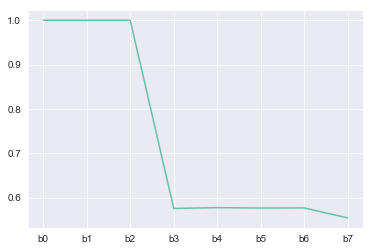

In [52]:
plt.plot(resultats['Comparaison_c0_cn_sur'],resultats['indice_rand'])


In [54]:
print(len(b0_data))
print(len(b1_data))
print(len(b2_data))
print(len(b3_data))
print(len(b4_data))
print(len(b5_data))
print(len(b6_data))
print(len(b7_data))

49676
56180
63214
70091
76991
83042
89020
96009


In [58]:
#b5byc0
unique_values, value_counts = np.unique(b5_by_c0, return_counts=True)
centroids=round(b5_data.groupby(b5_by_c0).mean(),2)
for value, count in zip(unique_values, value_counts):
    order=centroids.iloc[value,0]
    rec=centroids.iloc[value,1]
    avg_pay=centroids.iloc[value,2]
    rev=centroids.iloc[value,3]
    credcard=centroids.iloc[value,4]
    print(f"{value} : {round(count/len(b5_by_c0)*100,2)} % , order : {order} , rec : {rec}, avg_pay : {avg_pay}, rev : {rev}, credcard : {credcard} ")

0 : 5.07 % , order : 0.0 , rec : 325.08, avg_pay : 145.92, rev : 1.96, credcard : 0.01 
1 : 60.19 % , order : 0.0 , rec : 318.54, avg_pay : 156.6, rev : 4.74, credcard : 1.0 
2 : 18.24 % , order : 0.0 , rec : 330.28, avg_pay : 133.79, rev : 4.73, credcard : 0.01 
3 : 16.5 % , order : 0.0 , rec : 311.28, avg_pay : 172.13, rev : 1.92, credcard : 1.0 


In [59]:
#b5byc5
unique_values, value_counts = np.unique(b5_by_c5, return_counts=True)
centroids=round(b5_data.groupby(b5_by_c5).mean(),2)
for value, count in zip(unique_values, value_counts):
    order=centroids.iloc[value,0]
    rec=centroids.iloc[value,1]
    avg_pay=centroids.iloc[value,2]
    rev=centroids.iloc[value,3]
    credcard=centroids.iloc[value,4]
    print(f"{value} : {round(count/len(b5_by_c5)*100,2)} % , order : {order} , rec : {rec}, avg_pay : {avg_pay}, rev : {rev}, credcard : {credcard} ")

0 : 37.92 % , order : 0.0 , rec : 228.9, avg_pay : 154.59, rev : 4.74, credcard : 1.0 
1 : 15.28 % , order : 0.0 , rec : 292.48, avg_pay : 174.03, rev : 1.82, credcard : 0.99 
2 : 23.18 % , order : 0.0 , rec : 328.97, avg_pay : 136.36, rev : 4.14, credcard : 0.01 
3 : 23.61 % , order : 0.0 , rec : 474.55, avg_pay : 159.36, rev : 4.64, credcard : 1.0 


In [60]:
#b3byc0
unique_values, value_counts = np.unique(b3_by_c0, return_counts=True)
centroids=round(b3_data.groupby(b3_by_c0).mean(),2)
for value, count in zip(unique_values, value_counts):
    order=centroids.iloc[value,0]
    rec=centroids.iloc[value,1]
    avg_pay=centroids.iloc[value,2]
    rev=centroids.iloc[value,3]
    credcard=centroids.iloc[value,4]
    print(f"{value} : {round(count/len(b3_by_c0)*100,2)} % , order : {order} , rec : {rec}, avg_pay : {avg_pay}, rev : {rev}, credcard : {credcard} ")

0 : 5.33 % , order : 0.0 , rec : 347.41, avg_pay : 145.4, rev : 1.95, credcard : 0.01 
1 : 59.37 % , order : 0.0 , rec : 353.86, avg_pay : 156.03, rev : 4.74, credcard : 1.0 
2 : 18.38 % , order : 0.0 , rec : 363.13, avg_pay : 133.14, rev : 4.73, credcard : 0.01 
3 : 16.92 % , order : 0.0 , rec : 337.21, avg_pay : 170.02, rev : 1.91, credcard : 1.0 


In [61]:
#b3byc3
unique_values, value_counts = np.unique(b3_by_c3, return_counts=True)
centroids=round(b3_data.groupby(b3_by_c3).mean(),2)
for value, count in zip(unique_values, value_counts):
    order=centroids.iloc[value,0]
    rec=centroids.iloc[value,1]
    avg_pay=centroids.iloc[value,2]
    rev=centroids.iloc[value,3]
    credcard=centroids.iloc[value,4]
    print(f"{value} : {round(count/len(b3_by_c3)*100,2)} % , order : {order} , rec : {rec}, avg_pay : {avg_pay}, rev : {rev}, credcard : {credcard} ")

0 : 36.6 % , order : 0.0 , rec : 270.57, avg_pay : 154.42, rev : 4.74, credcard : 1.0 
1 : 15.76 % , order : 0.0 , rec : 320.47, avg_pay : 171.17, rev : 1.82, credcard : 0.99 
2 : 23.59 % , order : 0.0 , rec : 359.53, avg_pay : 135.87, rev : 4.12, credcard : 0.01 
3 : 24.05 % , order : 0.0 , rec : 490.84, avg_pay : 158.32, rev : 4.64, credcard : 1.0 
